# Twitter Analyzer

In [1]:
# do some importing
from datetime import datetime
import tweepy
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = json.loads(open("config.json", "r").read())
auth = tweepy.OAuthHandler(config["CONSUMER_KEY"], config["CONSUMER_SECRET"])
auth.set_access_token(config["ACCESS_TOKEN"] , config["ACCESS_TOKEN_SECRET"])
api = tweepy.API(auth)

<b> After we've initalized the Twitter API, we can go searching through a specific user and get all the information about their timeline </b>

In [9]:
current_page, total_tweets = 0, []
while True:
    public_tweets = api.user_timeline("Airikan_", count=500, page=current_page)
    if(len(public_tweets) == 0):
        # go to the next page until one of them is empty
        break
        
    total_tweets.extend(public_tweets)
    current_page += 1
    # can only see so many tweets per page so go to the next page

<b> Let's check out how many tweets this person has </b>

<small> For some reason it's less than Twitter shows on their page, but I bet this is something to do with retweets </small>

In [10]:
print(len(total_tweets))

1258


In [11]:
likes = pd.Series([t.favorite_count for t in total_tweets])
text = pd.Series([t.text for t in total_tweets])
dates = pd.Series([t.created_at for t in total_tweets])

df = pd.DataFrame({"likes" : likes, "dates": dates, "text": text})
df.set_index("dates", inplace=True)

<b> Now we can find the tweet that has the most likes... </b>

In [12]:
df[df.likes == df.likes.max()]

,likes,text
dates,,
2020-03-31 19:18:46,958,@KEEMSTAR https://t.co/aRjRfwyGhC


<b> And also plot each tweet across time </b>

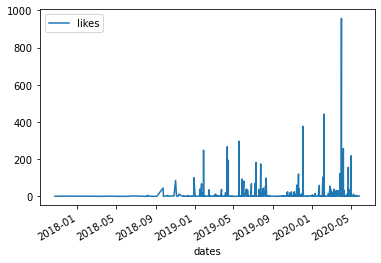

In [13]:
df.plot()

<b> And then some general statistics about likes </b>

In [16]:
df.describe()

,likes
count,1258.000000
mean,7.556439
std,40.012175
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,958.000000
